In [3]:
#라이브러리 import
import pandas as pd # 데이터프레임형태로 구성
import glob # 파일명을 리스트 형식으로 변경
import re # 문자열에 맞는 패턴을 교체
from functools import reduce # 1차원 리스트로 변경
from nltk.tokenize import word_tokenize # 단어 토큰화 작업을 위한 모듈
from nltk.corpus import stopwords # 불용어 정보를 제공하는 모듈
from nltk.stem import WordNetLemmatizer # 단어 형태의 일반화를 위해 표제어 추출을 제공하는 모듈
from collections import Counter # 데이터 집합에서 개수를 자동으로 계산하기 위한 모듈
import matplotlib.pyplot as plt # 그래프
from wordcloud import STOPWORDS, WordCloud # 워드클라우드
import nltk # 파이썬 패키지

In [5]:
# 파일 확인
# glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
all_files = glob.glob('C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/RISS/myCabinetExcelData*.xls')
all_files

['C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/RISS\\myCabinetExcelData (1).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/RISS\\myCabinetExcelData (2).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/RISS\\myCabinetExcelData (3).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/RISS\\myCabinetExcelData (4).xls',
 'C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/RISS\\myCabinetExcelData.xls']

In [6]:
# 파일 병합
all_files_data = [] # 저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame) # 파일 합치기
all_files_data[0] 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,The Future of Very Large Database,"Winter, R.",DATABASE PROGRAMMING AND DESIGN,1994
1,NaN,2,A Visual Database Management Tool: The Design ...,"Ibrahim, M.; Knight, J.; Crooks, J.",IEEE Computer Society,1997
2,NaN,3,10 Steps to Database Migration,"Paris, K.",DATABASE PROGRAMMING AND DESIGN,1994
3,NaN,4,Towards a Spatio-Temporal OQL for the Four Dim...,"Kuroki, S.; Ishizuka, K.; Makinouchi, A.",IEEE Computer Society,1997
4,NaN,5,Database Design for Very Small Companies,"Hall, L.; Hanson, O.; Pope, A.",IEEE Computer Society,1998
...,...,...,...,...,...,...
95,NaN,96,Secure locking protocols for multilevel databa...,"Jajodia, S.; Mancini, L.; Ray, I.",Chapman & Hall on behalf of the International ...,1996
96,NaN,97,Rule and Knowledge Management in an Active Dat...,"Naqvi, W.;Ibrahim, M. T.",Springer-Verlag,1993
97,NaN,98,Events in an Active Object-Oriented Database S...,"Gatziu, S.;Dittrich, K. R.",Springer-Verlag,1993
98,NaN,99,Customer requirements for security in relation...,"Schaefer, M.;Henning, R. R.;Miller, R. L.;Pare...",Chapman & Hall,1995


In [7]:
# 파일 병합
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) #concat 함수는 데이터프레임을 연결시켜주는 함수
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,The Future of Very Large Database,"Winter, R.",DATABASE PROGRAMMING AND DESIGN,1994
1,NaN,2,A Visual Database Management Tool: The Design ...,"Ibrahim, M.; Knight, J.; Crooks, J.",IEEE Computer Society,1997
2,NaN,3,10 Steps to Database Migration,"Paris, K.",DATABASE PROGRAMMING AND DESIGN,1994
3,NaN,4,Towards a Spatio-Temporal OQL for the Four Dim...,"Kuroki, S.; Ishizuka, K.; Makinouchi, A.",IEEE Computer Society,1997
4,NaN,5,Database Design for Very Small Companies,"Hall, L.; Hanson, O.; Pope, A.",IEEE Computer Society,1998
...,...,...,...,...,...,...
495,NaN,96,Physical Design Aspects of an Object-Oriented ...,"Voigtmann, A.; Becker, L.; Hinrichs, K. H.",IEEE Computer Society,1997
496,NaN,97,Alternative Correctness Criteria for Multivers...,"Park, C.; Park, S.",IEEE Computer Society,1998
497,NaN,98,Discovery and Application of Inter-Class Patte...,"Lee, D.-H.; Seo, D.-Y.; Moon, K.-S.; Chang, J.",IEEE Computer Society,1997
498,NaN,99,Relational Database Reverse Engineering: A Mod...,"Embley, D. W.; Xu, M.",IEEE Computer Society,1997


In [8]:
# csv 파일로 병합한 데이터를 저장해준다.
all_files_data_concat.to_csv('C:/Users/da_mi/OneDrive/바탕 화면/4학년1학기/빅데이터/과제/riss_database.csv', encoding = 'utf-8', index = False)

In [9]:
all_title = all_files_data_concat['제목']
all_title

0                      The Future of Very Large Database
1      A Visual Database Management Tool: The Design ...
2                         10 Steps to Database Migration
3      Towards a Spatio-Temporal OQL for the Four Dim...
4               Database Design for Very Small Companies
                             ...                        
495    Physical Design Aspects of an Object-Oriented ...
496    Alternative Correctness Criteria for Multivers...
497    Discovery and Application of Inter-Class Patte...
498    Relational Database Reverse Engineering: A Mod...
499                               From Model to Database
Name: 제목, Length: 500, dtype: object

In [10]:
# 영어 불용어 제거
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer( )

In [11]:
# 알파벳 으로 시작하지 않는 단어"[^a-zA-Z]+"는 공백으로 치환하여re.sub( ) 제거하고, 소문자로 정규화 하고lower( ), 단어 토큰화word_tokenize( )를한다.
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [12]:
print(words)

[['future', 'large', 'database'], ['visual', 'database', 'management', 'tool', 'design', 'semi', 'intelligent', 'dba', 'tool', 'relational', 'dbms'], ['step', 'database', 'migration'], ['towards', 'spatio', 'temporal', 'oql', 'four', 'dimensional', 'spatial', 'database', 'system', 'hawk'], ['database', 'design', 'small', 'company'], ['extending', 'odmg', 'federated', 'database', 'system'], ['implementation', 'checkout', 'checkin', 'mechanism', 'object', 'oriented', 'database', 'system'], ['webintool', 'generic', 'web', 'database', 'interface', 'building', 'tool'], ['searching', 'human', 'nutrition', 'information', 'human', 'nutrition', 'database'], ['database', 'configuration', 'management'], ['approach', 'multiparadigm', 'programming', 'database', 'system'], ['real', 'time', 'scheduling', 'semantic', 'concurrency', 'control', 'object', 'oriented', 'database', 'system'], ['apply', 'nearest', 'rule', 'fuzzy', 'object', 'oriented', 'database'], ['ciqm', 'report', 'database', 'quality'], 

In [13]:
# 1차원리스트로 변환 
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #출력하여 내용 확인

['future', 'large', 'database', 'visual', 'database', 'management', 'tool', 'design', 'semi', 'intelligent', 'dba', 'tool', 'relational', 'dbms', 'step', 'database', 'migration', 'towards', 'spatio', 'temporal', 'oql', 'four', 'dimensional', 'spatial', 'database', 'system', 'hawk', 'database', 'design', 'small', 'company', 'extending', 'odmg', 'federated', 'database', 'system', 'implementation', 'checkout', 'checkin', 'mechanism', 'object', 'oriented', 'database', 'system', 'webintool', 'generic', 'web', 'database', 'interface', 'building', 'tool', 'searching', 'human', 'nutrition', 'information', 'human', 'nutrition', 'database', 'database', 'configuration', 'management', 'approach', 'multiparadigm', 'programming', 'database', 'system', 'real', 'time', 'scheduling', 'semantic', 'concurrency', 'control', 'object', 'oriented', 'database', 'system', 'apply', 'nearest', 'rule', 'fuzzy', 'object', 'oriented', 'database', 'ciqm', 'report', 'database', 'quality', 'three', 'tier', 'client', '

In [14]:
count = Counter(words2)
count

Counter({'future': 5,
         'large': 8,
         'database': 530,
         'visual': 10,
         'management': 54,
         'tool': 8,
         'design': 45,
         'semi': 3,
         'intelligent': 12,
         'dba': 4,
         'relational': 31,
         'dbms': 5,
         'step': 4,
         'migration': 4,
         'towards': 6,
         'spatio': 4,
         'temporal': 8,
         'oql': 2,
         'four': 2,
         'dimensional': 4,
         'spatial': 11,
         'system': 158,
         'hawk': 2,
         'small': 2,
         'company': 7,
         'extending': 8,
         'odmg': 4,
         'federated': 8,
         'implementation': 11,
         'checkout': 2,
         'checkin': 2,
         'mechanism': 4,
         'object': 77,
         'oriented': 53,
         'webintool': 2,
         'generic': 2,
         'web': 18,
         'interface': 37,
         'building': 9,
         'searching': 4,
         'human': 10,
         'nutrition': 4,
         'information

In [15]:
#출현횟수가 많은 상위 50개 단어 추출
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s: %d" % (tag, counts))

database: 530
system: 158
object: 77
management: 54
oriented: 53
design: 45
application: 41
interface: 37
based: 36
multimedia: 32
relational: 31
data: 27
using: 23
approach: 22
user: 20
query: 20
model: 19
parallel: 19
web: 18
access: 18
transaction: 17
language: 17
server: 16
time: 15
performance: 15
distributed: 15
real: 14
active: 14
marketing: 14
client: 13
processing: 13
new: 13
intelligent: 12
development: 12
multi: 12
environment: 12
spatial: 11
implementation: 11
information: 11
control: 11
image: 11
method: 11
technique: 11
evaluation: 11
video: 11
algorithm: 11
virtual: 11
visual: 10
human: 10
view: 10


In [16]:
# 주제어 제거
del word_count['database']

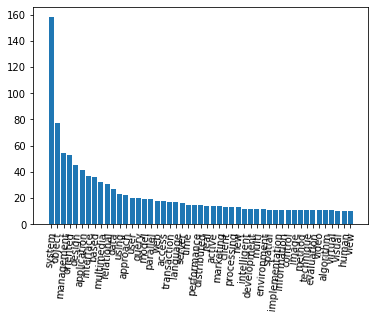

In [17]:
# bar 함수로 시각화
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [18]:
# "출판일"을 기준으로 그룹을 만들고 리스트 생성
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1976,3
1,1977,6
2,1978,2
3,1979,1
4,1980,1
5,1981,2
6,1982,2
7,1983,2
8,1984,4
9,1986,1


In [19]:
# 출판사 별로 그룹화
all_files_data_concat['doc_count2'] = 0
summary_publisher = all_files_data_concat.groupby('출판사', as_index = False)['doc_count2'].count()
summary_publisher

,출판사,doc_count2
0,00,6
1,A P PUBLICATIONS,7
2,ACM ASSOCIATION FOR COMPUTING MACHINERY,7
3,Association for Computing Machinery,31
4,Chapman & Hall,8
5,Chapman & Hall on behalf of the International ...,2
6,Chapman and Hall,5
7,City University of Hong Kong Press,7
8,DATABASE PROGRAMMING AND DESIGN,45
9,HENRY STEWART PUBLICATIONS,14


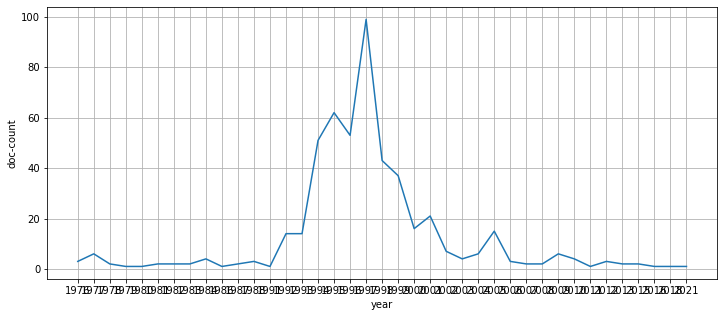

In [20]:
# 출판일 별 출간한 책 수 시각화
# summary_year의 doc_count 컬럼을 차트의 y축으로 설정하고plt.plot( ), ‘출판일’ 컬럼은 x축으로 설정하여plt.xticks( ) 차트를 그린다.
plt.figure(figsize = (12, 5)) # 그래프 사이즈 설정
plt.xlabel("year") # x축 라벨
plt.ylabel("doc-count") #y축 라벨
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

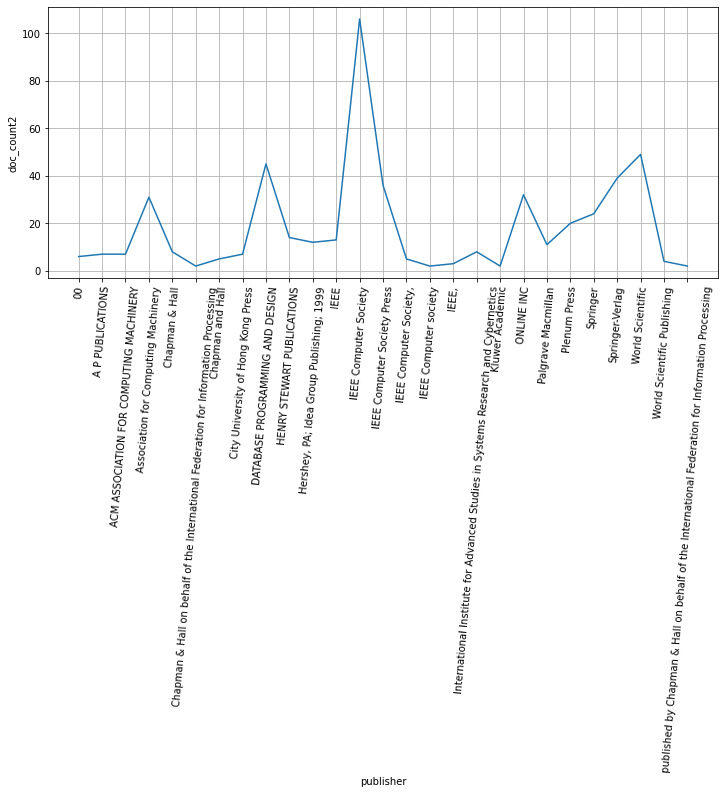

In [22]:
# 출판사별 출간한 책 수 시각화
# summary_publisher의 doc_count2 컬럼을 차트의 y축으로 설정하고plt.plot( ), ‘출판사’ 컬럼은 x축으로 설정하여plt.xticks( ) 차트를 그린다.
plt.figure(figsize = (12, 5))
plt.xlabel("publisher")
plt.ylabel("doc_count2")
plt.grid(True)
plt.plot(summary_publisher['출판사'], summary_publisher['doc_count2'])
plt.xticks(rotation ='85')
plt.show()

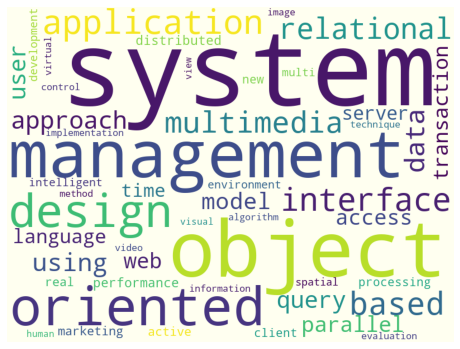

In [20]:
# 워드클라우드에서 처리할 불용어를 설정하고set(STOPWORDS), 워드클라우드 객체를 생성 
# 워드클라우드 객체인 wc에 word_count 데이터를 담아서wc.generate_ from_frequencies( ) cloud 객체를 생성
# 생성한 워드클라우드는 matplotlib.pyplot을 사용하여 나타낸다. 
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:
# riss_database_wordcloud.jpg로 저장한다.
cloud.to_file("riss_database_wordCloud.jpg")